<a href="https://colab.research.google.com/github/Gloomy-Owl/DevOps/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#2 Дельта правило
#------------------------------------
import numpy as np

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

T = np.array([0,0,0,1])

eta=0.1
weights = np.zeros(2)
bias=0.0

print("Начальные веса:", weights, "смещение:", bias)


for epoch in range(10):
  for x, t in zip(X, T):
    y = np.dot(x, weights) + bias
    error = t - y
    weights += eta * error * x
    bias += eta * error
  print(f"Эпоха {epoch+1}, веса: {weights}, смещение: {bias}")

print("\nПроверка работы после обучения:")
for x, t in zip(X, T):
  y_lin=np.dot(x, weights) + bias
  print(f"Вход: {x}, целевой: {t}, линейный выход: {y_lin:.3f}")


Начальные веса: [0. 0.] смещение: 0.0
Эпоха 1, веса: [0.1 0.1], смещение: 0.1
Эпоха 2, веса: [0.16112 0.15922], смещение: 0.13212000000000002
Эпоха 3, веса: [0.20258054 0.19808926], смещение: 0.13255574400000003
Эпоха 4, веса: [0.23371999 0.22650395], смещение: 0.1187006755328
Эпоха 5, веса: [0.25910386 0.24927607], смещение: 0.09888101709940736
Эпоха 6, веса: [0.28099036 0.26876266], смещение: 0.07705252213559988
Эпоха 7, веса: [0.3005204  0.28613437], смещение: 0.05506631415784157
Эпоха 8, веса: [0.31829198 0.30198762], смещение: 0.0337618583471239
Эпоха 9, веса: [0.33463769 0.31664003], смещение: 0.013494056213774787
Эпоха 10, веса: [0.34975884 0.3302731 ], смещение: -0.005612672050640838

Проверка работы после обучения:
Вход: [0 0], целевой: 0, линейный выход: -0.006
Вход: [0 1], целевой: 0, линейный выход: 0.325
Вход: [1 0], целевой: 0, линейный выход: 0.344
Вход: [1 1], целевой: 1, линейный выход: 0.674


In [ ]:
# 1 Новый Хебб
#------------------------------------
import numpy as np


def hebbian_learning(inputs, outputs, learning_rate):
  num_inputs = inputs.shape[1]
  weights = np.zeros(num_inputs)  # Инициализируем веса нулями

  print("Изначальные веса:", weights)
  print("-" * 30)

  for i, (x, y) in enumerate(zip(inputs, outputs)):
    # Правило Хебба: изменение веса = скорость обучения * вход * выход
    delta_w = learning_rate * x * y
    weights += delta_w  # Обновляем веса

    print(f"Пример {i + 1}:")
    print(f"  Вход (x): {x}")
    print(f"  Выход (y): {y}")
    print(f"  Изменение весов (delta_w): {delta_w}")
    print(f"  Новые веса: {weights}")
    print("-" * 30)

  return weights



if __name__ == "__main__":

  X = np.array([
    [1, 1],
    [1, -1],
    [-1, 1],
    [-1, -1],
    [2, 1]
  ])

  # Ожидаемые выходы (в данном случае, просто повторяем первый вход)
  y = np.array([1, 1, -1, -1, 1])

  # Задаем скорость обучения
  eta = 0.5

  # Запускаем обучение
  final_weights = hebbian_learning(X, y, eta)

  print("Финальные веса после обучения:", final_weights)

Изначальные веса: [0. 0.]
------------------------------
Пример 1:
  Вход (x): [1 1]
  Выход (y): 1
  Изменение весов (delta_w): [0.5 0.5]
  Новые веса: [0.5 0.5]
------------------------------
Пример 2:
  Вход (x): [ 1 -1]
  Выход (y): 1
  Изменение весов (delta_w): [ 0.5 -0.5]
  Новые веса: [1. 0.]
------------------------------
Пример 3:
  Вход (x): [-1  1]
  Выход (y): -1
  Изменение весов (delta_w): [ 0.5 -0.5]
  Новые веса: [ 1.5 -0.5]
------------------------------
Пример 4:
  Вход (x): [-1 -1]
  Выход (y): -1
  Изменение весов (delta_w): [0.5 0.5]
  Новые веса: [2. 0.]
------------------------------
Пример 5:
  Вход (x): [2 1]
  Выход (y): 1
  Изменение весов (delta_w): [1.  0.5]
  Новые веса: [3.  0.5]
------------------------------
Финальные веса после обучения: [3.  0.5]


In [ ]:
#3  Обратное распространение ошибки
#------------------------------------
import numpy as np


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
  return x * (1 - x)


X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

np.random.seed(1)


synapse0 = 2 * np.random.random((3, 4)) - 1
synapse1 = 2 * np.random.random((4, 1)) - 1

for i in range(10000):
  # Шаг 1: Прямой проход
  layer0 = X
  layer1 = sigmoid(np.dot(layer0, synapse0))
  layer2 = sigmoid(np.dot(layer1, synapse1))

  # Шаг 2: Вычисление ошибки
  layer2_error = y - layer2

  # Шаг 3: Обратный проход
  layer2_delta = layer2_error * sigmoid_derivative(layer2)

  layer1_error = layer2_delta.dot(synapse1.T)

  layer1_delta = layer1_error * sigmoid_derivative(layer1)

  # Шаг 4: Обновление весов (градиентный спуск)
  synapse1 += layer1.T.dot(layer2_delta)
  synapse0 += layer0.T.dot(layer1_delta)

print("Обученная нейронная сеть (выходы после обучения):")
print(layer2)

Обученная нейронная сеть (выходы после обучения):
[[0.00702213]
 [0.99100952]
 [0.99215162]
 [0.01047911]]


In [ ]:
#4 Радиально-базисных функций
#------------------------------------
import numpy as np

# --- данные: XOR ---
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])  # цель

# --- выбираем центры ---
centers = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
sigma = 0.4  # ширина

def rbf(x, c, s):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * s ** 2))

# --- строим матрицу активаций ---
G = np.zeros((len(X), len(centers)))
for i, sample in enumerate(X):
    for j, center in enumerate(centers):
        G[i, j] = rbf(sample, center, sigma)

# --- решаем задачу линейной регрессии для весов выхода ---
weights = np.linalg.pinv(G).dot(y)

# --- предсказание ---
pred = G.dot(weights)
print("Предсказания:", np.round(pred, 3))

Предсказания: [-0.  1.  1. -0.]


Финальные веса карты (координаты нейронов):
[[0.74251752 0.73023489]
 [0.67970138 0.6882782 ]
 [0.67546392 0.6419642 ]
 [0.72853176 0.36535941]
 [0.86813983 0.24276648]
 [0.62849528 0.71151499]
 [0.60680707 0.68915319]
 [0.62872145 0.64149133]
 [0.51416941 0.43749326]
 [0.5903654  0.3128228 ]
 [0.5258358  0.71994362]
 [0.48906596 0.68312681]
 [0.34308997 0.62389061]
 [0.31662127 0.36886311]
 [0.35078676 0.24641236]
 [0.29925796 0.71087862]
 [0.29149032 0.69613412]
 [0.23242211 0.45059591]
 [0.22721593 0.37271871]
 [0.22635476 0.28248526]
 [0.19688052 0.71436938]
 [0.21798782 0.68337201]
 [0.20534672 0.43970131]
 [0.18437907 0.33726509]
 [0.16867204 0.23164503]]


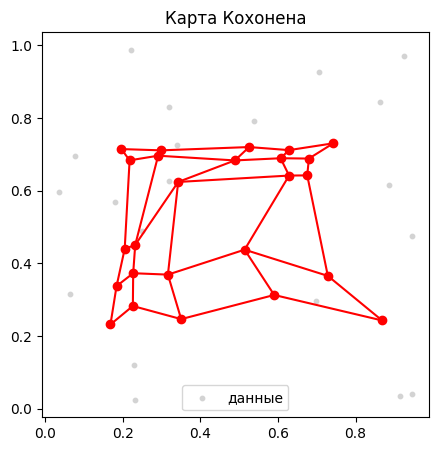

In [ ]:
#5 Карты Кохонена
#------------------------------------
import matplotlib.pyplot as plt
import numpy as np

# --- параметры ---
n, m = 5, 5   # размер карты
dim = 2       # размерность входа
epochs = 100
lr = 0.3
radius = max(n, m) / 2

# --- инициализация весов случайно ---
weights = np.random.rand(n, m, dim)

# --- данные: точки на плоскости ---
X = np.random.rand(20, 2)  # 200 случайных точек (0..1,0..1)

def find_bmu(x):
    """Находим ближайший нейрон (Best Matching Unit)"""
    diff = weights - x
    dist = np.linalg.norm(diff, axis=2)
    return np.unravel_index(np.argmin(dist), dist.shape)

# --- обучение ---
for epoch in range(epochs):
    for x in X:
        bmu = find_bmu(x)
        for i in range(n):
            for j in range(m):
                d = np.sqrt((i - bmu[0]) ** 2 + (j - bmu[1]) ** 2)
                if d < radius:
                    influence = np.exp(-d**2 / (2 * (radius**2)))
                    weights[i, j] += lr * influence * (x - weights[i, j])

# --- результат ---
print("Финальные веса карты (координаты нейронов):")
print(weights.reshape(-1, 2))

# --- визуализация ---
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], s=10, color='lightgray', label='данные')

# рисуем нейроны (узлы карты)
for i in range(n):
    for j in range(m):
        plt.scatter(weights[i,j,0], weights[i,j,1], color='red')

# рисуем связи между соседними нейронами (чтобы увидеть "сетку")
for i in range(n):
    plt.plot(weights[i,:,0], weights[i,:,1], color='red')  # строки
for j in range(m):
    plt.plot(weights[:,j,0], weights[:,j,1], color='red')  # столбцы

plt.title("Карта Кохонена")
plt.legend()
plt.show()

Начало Фазы 1: Обучение Кохонена
  Эпоха Кохонена 100/500, альфа: 0.0000
  Эпоха Кохонена 200/500, альфа: 0.0000
  Эпоха Кохонена 300/500, альфа: 0.0000
  Эпоха Кохонена 400/500, альфа: 0.0000
  Эпоха Кохонена 500/500, альфа: 0.0000

Начало Фазы 2: Обучение Гроссберга
  Эпоха Гроссберга 100/500, бета: 0.0000, MSE: 0.005869
  Эпоха Гроссберга 200/500, бета: 0.0000, MSE: 0.005869
  Эпоха Гроссберга 300/500, бета: 0.0000, MSE: 0.005869
  Эпоха Гроссберга 400/500, бета: 0.0000, MSE: 0.005869
  Эпоха Гроссберга 500/500, бета: 0.0000, MSE: 0.005869

--- Результаты предсказания (первые 10 примеров) ---
Цель: 21.5397, Предсказание: 18.9100
Цель: 15.6436, Предсказание: 19.8630
Цель: 4.2410, Предсказание: 6.2543
Цель: 17.4588, Предсказание: 18.9100
Цель: 17.3291, Предсказание: 15.4366
Цель: 19.4360, Предсказание: 18.9100
Цель: 8.4575, Предсказание: 11.8069
Цель: 4.8748, Предсказание: 6.2543
Цель: 11.6072, Предсказание: 12.4162
Цель: 9.0305, Предсказание: 8.1971

Среднеквадратичная ошибка (MSE) н

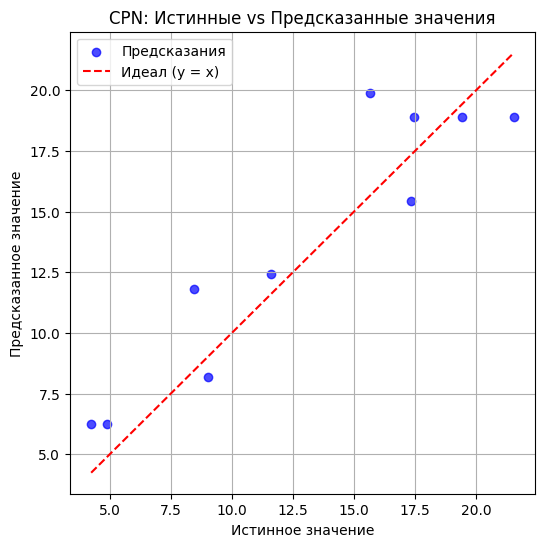

In [ ]:
#6   Встречного распространения
#------------------------------------
import matplotlib.pyplot as plt
import numpy as np

class ForwardOnlyCPN:
    """
    Реализация прямой сети встречного распространения (Forward-only Counterpropagation Network).
    """
    def __init__(self, input_size, kohonen_size, output_size):
        # Инициализация архитектуры
        self.input_size = input_size
        self.kohonen_size = kohonen_size
        self.output_size = output_size

        # Веса Кохонена (W_in): от входного слоя к слою Кохонена
        # Размерность: (kohonen_size, input_size)
        # Инициализируем небольшими случайными значениями
        self.W_in = np.random.rand(kohonen_size, input_size) * 0.1

        # Веса Гроссберга (W_out): от слоя Кохонена к выходному слою
        # Размерность: (output_size, kohonen_size)
        # Инициализируем небольшими случайными значениями
        self.W_out = np.random.rand(output_size, kohonen_size) * 0.1

    def _find_winner(self, x):
        """ Находит нейрон-победитель в слое Кохонена (по минимальному Евклидову расстоянию). """
        # Вычисляем Евклидово расстояние между входным вектором x и весами каждого нейрона Кохонена
        distances = np.linalg.norm(self.W_in - x, axis=1)
        # Возвращаем индекс нейрона с минимальным расстоянием
        return np.argmin(distances)

    def train(self, X, Y, epochs_kohonen, epochs_grossberg, alpha_start, beta_start):
        """
        Тренировка сети в две фазы.
        X - входные данные, Y - целевые выходные данные.
        alpha_start, beta_start - начальные коэффициенты обучения.
        """

        # --- ФАЗА 1: Обучение Кохонена (Неконтролируемое обучение) ---
        print("Начало Фазы 1: Обучение Кохонена")
        alpha = alpha_start
        for epoch in range(epochs_kohonen):
            # Постепенное уменьшение коэффициента обучения
            alpha = alpha * (1.0 - epoch / epochs_kohonen)

            for x in X:
                # 1. Найти нейрон-победитель j
                j = self._find_winner(x)

                # 2. Обновить веса победителя (правило Кохонена)
                # W_in[j] - это весовой вектор нейрона-победителя
                self.W_in[j] = self.W_in[j] + alpha * (x - self.W_in[j])

            if (epoch + 1) % 100 == 0:
                print(f"  Эпоха Кохонена {epoch + 1}/{epochs_kohonen}, альфа: {alpha:.4f}")

        # --- ФАЗА 2: Обучение Гроссберга (Контролируемое обучение) ---
        print("\nНачало Фазы 2: Обучение Гроссберга")
        beta = beta_start
        for epoch in range(epochs_grossberg):
            # Постепенное уменьшение коэффициента обучения
            beta = beta * (1.0 - epoch / epochs_grossberg)

            total_error = 0
            for x, y_target in zip(X, Y):
                # 1. Найти нейрон-победитель j
                j = self._find_winner(x)

                # 2. Выход слоя Кохонена (только победитель активен)
                z = np.zeros(self.kohonen_size)
                z[j] = 1.0 # Единичная активация победителя

                # 3. Вычислить фактический выход (линейное комбинирование весов W_out и активации z)
                y_pred = self.W_out @ z

                # 4. Обновить веса Гроссберга (правило Гроссберга/Outstar)
                # Обновляются только веса W_out, исходящие от нейрона-победителя j
                # В матрице W_out это j-й столбец
                self.W_out[:, j] = self.W_out[:, j] + beta * (y_target - y_pred)

                # Подсчет ошибки
                total_error += np.sum((y_target - y_pred) ** 2)

            mse = total_error / len(X)
            if (epoch + 1) % 100 == 0:
                print(f"  Эпоха Гроссберга {epoch + 1}/{epochs_grossberg}, бета: {beta:.4f}, MSE: {mse:.6f}")


    def predict(self, X):
        """ Предсказание выхода для новых входных данных. """
        predictions = []
        for x in X:
            j = self._find_winner(x)
            z = np.zeros(self.kohonen_size)
            z[j] = 1.0
            y_pred = self.W_out @ z
            predictions.append(y_pred)
        return np.array(predictions)

# --- Пример использования ---

# 1. Генерация данных для аппроксимации функции (например, Y = 0.5 * X1 + 2 * X2)
# X - входные данные (2 признака), Y - целевые выходы (1 признак)
np.random.seed(42)
num_samples = 200
X_data = np.random.rand(num_samples, 2) * 10
Y_data = (0.5 * X_data[:, 0] + 2 * X_data[:, 1] + np.random.randn(num_samples) * 0.5)[:, np.newaxis] # Добавляем небольшой шум

# Нормализация данных (важный шаг для сетей Кохонена)
X_min, X_max = X_data.min(axis=0), X_data.max(axis=0)
Y_min, Y_max = Y_data.min(axis=0), Y_data.max(axis=0)

X_norm = (X_data - X_min) / (X_max - X_min)
Y_norm = (Y_data - Y_min) / (Y_max - Y_min)

# 2. Создание и обучение CPN
INPUT_SIZE = X_norm.shape[1]
KOHONEN_SIZE = 10  # Количество кластеров/нейронов в скрытом слое
OUTPUT_SIZE = Y_norm.shape[1]

cpn = ForwardOnlyCPN(INPUT_SIZE, KOHONEN_SIZE, OUTPUT_SIZE)

cpn.train(
    X=X_norm,
    Y=Y_norm,
    epochs_kohonen=500,
    epochs_grossberg=500,
    alpha_start=0.1,
    beta_start=0.1
)

# 3. Тестирование и оценка
X_test_norm = X_norm[:10]
Y_test_norm = Y_norm[:10]
Y_pred_norm = cpn.predict(X_test_norm)

# Обратная денормализация для сравнения
Y_pred = Y_pred_norm * (Y_max - Y_min) + Y_min
Y_test = Y_test_norm * (Y_max - Y_min) + Y_min

print("\n--- Результаты предсказания (первые 10 примеров) ---")
for target, pred in zip(Y_test, Y_pred):
    print(f"Цель: {target[0]:.4f}, Предсказание: {pred[0]:.4f}")

mse_test = np.mean((Y_test - Y_pred)**2)
print(f"\nСреднеквадратичная ошибка (MSE) на тесте: {mse_test:.4f}")

# --- Визуализация результатов ---
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, color='blue', label='Предсказания', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         'r--', label='Идеал (y = x)')
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.title('CPN: Истинные vs Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 7 Рекуррентные сети
#------------------------------------
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# --- 1. Подготовка данных ---

def create_sequences(data, seq_length):
    """Преобразует одномерный массив в последовательности (X) и метки (y)."""
    X, y = [], []
    for i in range(len(data) - seq_length):
        # Входная последовательность
        seq_in = data[i:i + seq_length]
        # Выходной элемент
        seq_out = data[i + seq_length]
        X.append(seq_in)
        y.append(seq_out)
    return np.array(X), np.array(y)

# Исходные данные
raw_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
SEQUENCE_LENGTH = 2

X, y = create_sequences(raw_data, SEQUENCE_LENGTH)

X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Форма входных данных X: {X.shape} (образцы, временные шаги, признаки)")
print(f"Форма меток y: {y.shape}")
print("-" * 30)

# --- 2. Создание модели SimpleRNN ---
model = Sequential()

# Слой SimpleRNN:
# 10 - количество скрытых узлов (нейронов)
model.add(SimpleRNN(10, activation='relu', input_shape=(SEQUENCE_LENGTH, 1), return_sequences=True))
model.add(SimpleRNN(10, activation='relu', input_shape=(SEQUENCE_LENGTH, 1)))

# Полносвязный слой для вывода одного числа (прогнозируемого значения)
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

model.summary()
print("-" * 30)

# --- 3. Обучение модели ---
print("Начало обучения...")
model.fit(X, y, epochs=200, verbose=0)
print("Обучение завершено.")
print("-" * 30)

# --- 4. Прогнозирование ---

# Подготовка входных данных для прогнозирования
input_seq = np.array([90, 100])
input_seq = input_seq.reshape((1, SEQUENCE_LENGTH, 1))

# Прогнозирование
predicted_value = model.predict(input_seq, verbose=0)

# Вывод результатов
print(f"Входная последовательность: {[90, 100]}")
print(f"Прогнозируемое значение: {np.round(predicted_value[0][0])}")

input_seq_2 = np.array([50, 60]).reshape((1, SEQUENCE_LENGTH, 1))
predicted_value_2 = model.predict(input_seq_2, verbose=0)

print(f"Входная последовательность: {[50, 60]}")
print(f"Прогнозируемое значение: {np.round(predicted_value_2[0][0])}")

Форма входных данных X: (8, 2, 1) (образцы, временные шаги, признаки)
Форма меток y: (8,)
------------------------------


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 2, 10)          │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341 (1.33 KB)

 Trainable params: 341 (1.33 KB)

 Non-trainable params: 0 (0.00 B)

------------------------------
Начало обучения...
Обучение завершено.
------------------------------
Входная последовательность: [90, 100]
Прогнозируемое значение: 111.0
Входная последовательность: [50, 60]
Прогнозируемое значение: 70.0


In [ ]:
# 8  Сверточные сети (только в pycharm, нужно доработать, чтобы загружать несколько картинок и по ним проводить выборку)
#------------------------------------
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# --- 1. Определение входных данных ---
img = load_img("image.png", target_size=(32, 32))
img_arr = img_to_array(img) / 255.0

# Создаём тренировочный датасет из одной и той же картинки
x_train = np.array([img_arr for _ in range(50)])
y_train = np.zeros((50, 1))

print("Форма x_train:", x_train.shape)
print("Форма y_train:", y_train.shape)

# --- 2. Создание модели CNN ---
model = Sequential()

# 1. Свёрточный слой (Conv2D)
model.add(Conv2D(
    filters=32,          # Количество фильтров (32 признака)
    kernel_size=(3, 3),  # Размер ядра свёртки 3x3
    activation='relu',   # Функция активации
    input_shape=(32, 32, 3) # Форма входного изображения (только высота, ширина, каналы)
))
# Размерность уменьшится: (32 - 3 + 1) = 30. Глубина станет 32.

# 2. Слой субдискретизации (MaxPooling2D)
# Уменьшение размерности
model.add(MaxPooling2D(
    pool_size=(2, 2)     # Размер окна объединения 2x2
))

# 3. Второй Свёрточный слой (Conv2D)
# Извлечение более сложных признаков
model.add(Conv2D(
    filters=64,          # Увеличение количества фильтров до 64
    kernel_size=(3, 3),  # Размер ядра 3x3
    activation='relu'
))

# 4. Второй Слой субдискретизации (MaxPooling2D)
model.add(MaxPooling2D(
    pool_size=(2, 2)
))

# 5. Развёртывающий слой (Flatten)
model.add(Flatten())

# 6. Полносвязный слой (Dense)
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Вывод сводки модели
model.summary()

model.fit(x_train, y_train, epochs=5, batch_size=8)

input_data = np.expand_dims(img_arr, axis=0)

prediction = model.predict(input_data)
print("Предсказание:", prediction)
print("Класс:", 1 if prediction[0][0] > 0.5 else 0)

Форма входных данных (Изображение): (1, 32, 32, 3)
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)